# <p style="text-align: center;">Optimisez la gestion des données d'une boutique </p>
# <p style="text-align: center;">avec Python</p>



# <a name="C0">Sommaire :</a>

##  <a href="#C1">Importation des données</a>
 

##  <a href="#C2">Partie 1 : Nettoyage et préparation des données</a>
#### <a href="#C3">     1.1. Traitement du dataframe "Web" </a>
#### <a href="#C4">     1.2. Traitement du dataframe "erp" </a>
#### <a href="#C5">     1.3. Traitement du dataframe "liaison" </a>

## <a href="#C6">Partie 2 : Rapprochement des DataFrames</a>
#### <a href="#C7">2.1. Fusion de "web" et de "liaison" </a>
#### <a href="#C8">2.2. Fusion de "web" de "liaison" et de "erp" </a>

##  <a href="#C9">Partie 3 : Analyse des données de vente </a>
####  <a href="#C10">3.1. Séléction des données de vente </a>
####  <a href="#C11"> 3.2. Etude du prix </a>
####  <a href="#C12"> 3.3. Détermination des prix aberrants </a>
####  <a href="#C13"> 3.4. Chiffre d'affaire est catégories de prix </a>
####  <a href="#C14"> 3.5. Recherche de correlation entre les variables </a>


Le travail qui suit consistera à nettoyer, préparer et à imputer des données manquantes. Ceci est dans le but d'effectuer un rapprochement entre le dataframe "web", contenant les informations des produits commercialisés en ligne et le dataframe "erp", contenant les informations de vente de l'ensemble de ces produits.

Le dataframe "liaison" jouera ici le rôle d'une table d'association entre les deux autres dataframes. On s'assurera de la désignation d'une clé primaire unique pour chacun des dataframes. Ces clés feront office de clés étrangères et leur ensemble de clé primaire du dataframe 'liaison".


# <a name="C1">Importation des données :</a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

In [1]:
# Importation des librairies :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
# Importation des données :
erp = pd.read_excel('erp.xlsx')
liaison = pd.read_excel('liaison.xlsx')
web = pd.read_excel('web.xlsx')

# <a name="C2"> Partie 1 : Nettoyage et préparation des données :</a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

## <a name="C3">1.1. Traitement du dataframe "Web" :</a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

#### Affichage des cinq premières lignes:

In [3]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


#### Affichage des informations:

In [4]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

#### Suppression des colonnes entièrement vides:

les colonnes " tax_class", "post_content", "post_password" et "post_content_filtered" ne contiennent aucune information. Nous allons procéder à leur supression.

In [5]:
for column in web.columns :
    if web[column].isna().sum() == len(web) :
         web = web.drop(column, axis = 1) 

In [6]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   virtual            1513 non-null   int64         
 2   downloadable       1513 non-null   int64         
 3   rating_count       1513 non-null   int64         
 4   average_rating     1430 non-null   float64       
 5   total_sales        1430 non-null   float64       
 6   tax_status         716 non-null    object        
 7   post_author        1430 non-null   float64       
 8   post_date          1430 non-null   datetime64[ns]
 9   post_date_gmt      1430 non-null   datetime64[ns]
 10  post_title         1430 non-null   object        
 11  post_excerpt       716 non-null    object        
 12  post_status        1430 non-null   object        
 13  comment_status     1430 non-null   object        
 14  ping_sta

#### Renommage de la colonne "sku" par "id_web" :

Pour faire le lien avec la table "liaison" nous devons concerver la même nomencalture des clés. La colonne "sku" sera renommer "id_web". Elle sera par la suite la clé primaire de la table "web". 

In [7]:
web = web.rename(columns = {'sku' : 'id_web'}) 

#### Suppression des lignes avec un "id_web" manquant :

Dans le soucis d'avoir des "id_web" uniques on va suprimer ceux qui manquent.

In [8]:
web.id_web.isna().sum() # Nombre d'"id_web" manquants.

85

In [9]:
# Enregistrement comportants des données et auxquels il manque un identifiant
web_id_web_nul = web[web.id_web.isna()]
web_id_web_nul[web_id_web_nul.count(axis = 1) > 3]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [10]:
index_id_web_null = web[web.id_web.isna()].index # Liste des index des "id_web" manquants.
web = web.drop(index_id_web_null) # Suppression des enregistrement correspondants aux "id_web" manquants.

In [11]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             1428 non-null   object        
 1   virtual            1428 non-null   int64         
 2   downloadable       1428 non-null   int64         
 3   rating_count       1428 non-null   int64         
 4   average_rating     1428 non-null   float64       
 5   total_sales        1428 non-null   float64       
 6   tax_status         714 non-null    object        
 7   post_author        1428 non-null   float64       
 8   post_date          1428 non-null   datetime64[ns]
 9   post_date_gmt      1428 non-null   datetime64[ns]
 10  post_title         1428 non-null   object        
 11  post_excerpt       714 non-null    object        
 12  post_status        1428 non-null   object        
 13  comment_status     1428 non-null   object        
 14  ping_sta

#### Informations sur les valeurs non-nulles uniques dans chaque colonne :

In [12]:
web.nunique()

id_web                714
virtual                 1
downloadable            1
rating_count            1
average_rating          1
total_sales            41
tax_status              1
post_author             2
post_date             714
post_date_gmt         714
post_title            711
post_excerpt          677
post_status             1
comment_status          1
ping_status             1
post_name             714
post_modified         587
post_modified_gmt     587
post_parent             1
guid                 1428
menu_order              1
post_type               2
post_mime_type          1
comment_count           1
dtype: int64

Le nombre d'"id_web" uniques est égal à la moitié du nombre d'enregistrements total. On va procéder à la suppression des enregistrements avec un "id_web" en double, mais avant, nous devons traiter les valeurs manquantes des colonnes "post_mime_type", "tax_status" et "post_excerpt" car on risque de perdre ces informations.

#### Traitement des colonnes "post_mime_type" et "tax_status":

Remplacement des valeurs manquantes de la colonne "post_mime_type" par sa valeur modale.

In [13]:
tax_status_mode = web.tax_status.mode()[0]
web.tax_status = web.tax_status.fillna(tax_status_mode) # Remplacement des valeurs manquantes par la valeur modale.

Remplacement des valeurs manquantes de la colonne "tax_status" par sa valeur modale.

In [14]:
post_mime_mode = web.post_mime_type.mode()[0]
web.post_mime_type = web.post_mime_type.fillna(post_mime_mode) # Remplacement des valeurs manquantes par la valeur modale.

Selection des enregistrements avec un "id_web" unique et sans valeurs manquantes pour les autres variables.

In [15]:
# Dataframe avec "id_web" unique :
web_id_web_dupli = web[web.id_web.duplicated()]
# Selection qui permet de concerver les valeurs de la colonne "post_excerpt" ;
web = web[(web.id_web.isin(web_id_web_dupli.id_web)) & (web.post_excerpt.notnull())] 

La colonne "post_name" contient la nomenclature unique des produits vendus. On va supprimer les traits d'unions qui séparent les mots.

In [16]:
web['post_name'] = web['post_name'].str.replace('-',' ')

Nous obtenant ainsi un dataframe avec une clé "id_web" unique et sans valeurs manquantes. 

In [17]:
web.tail()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
762,16135,0,0,0,0.0,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes le bihan aime chai 2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
767,15891,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin larredya jurancon sec la virada 2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
768,15887,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet cote rotie fructus voluptas 2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos du mont olivet chateauneuf du pape 2007 2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
798,16230,0,0,0,0.0,0.0,taxable,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,...,closed,domaine saint nicolas fiefs vendeens blanc les...,2020-08-13 10:45:03,2020-08-13 08:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0


## <a name="C4">1.2. Traitement du dataframe "erp" :</a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

#### Affichage des cinq premières lignes :

In [18]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


#### Affichage des informations :

In [19]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


#### Informations sur les valeurs non-nulles uniques dans chaque colonne :

In [20]:
erp.nunique()

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

#### Traitement des valeur aberrantes de la colonne "stock_status" :

Les valeurs de "stock_status" sont conditionnées par celles de "stock_quantity". Verifions s'il n'y a pas d'anomalies:

In [21]:
erp[(erp.stock_quantity == 0) & (erp.stock_status == 'instock')]

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


In [22]:
erp[(erp.stock_quantity != 0) & (erp.stock_status == 'outofstock')]

,product_id,onsale_web,price,stock_quantity,stock_status


#### Correction des valeurs aberrantes dans "stock_status" :

In [23]:
erp.at[443, 'stock_status'] = 'outofstock' 

## <a name="C5"> 1.3. Traitement du dataframe "liaison" :</a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

#### Affichage des cinq dernieres lignes :

In [24]:
liaison.tail()

,product_id,id_web
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1
824,7338,16230


#### Affichage des informations :

In [25]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


#### Informations sur les valeurs non-nulles uniques dans chaque colonne :

In [26]:
liaison.nunique()

product_id    825
id_web        734
dtype: int64

#### Supression des enregistrements avec un "id_web" nul:

La clé primaire ici est composée des deux variables "product_id" et "id_web". L'unicité de cette clé exige la suppression des enregistrement avec des "id_web" manquants.

In [27]:
liaison.id_web.isna().sum()

91

In [28]:
liaison = liaison.dropna() # suppression des enregistrements avec un "id_web" manquants.

In [29]:
liaison.info() # Vérification des informations.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  734 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


# <a name="C6">Partie 2 : Rapprochement des DataFrames : </a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

## <a name="C7">2.1. Fusion de "web" et de "liaison" :</a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

Tous les "id_web" de "web" figurent dans la colonne "id_web" de "liaison". Une fusion type "inner" ou "right" dans notre exemple donnera le même résultat. Dans le cas contraire, une jointure à droite est souhaitable afin de garder toutes les information du dataframe "web".

In [30]:
set(web.id_web) - set(liaison.id_web) # différence entre les "id_web" des deux dataframes "web" et "liaison".

set()

In [31]:
liaison_web = pd.merge(liaison, web, on = 'id_web', how = 'right')
liaison_web.head()

,product_id,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,4954,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,...,closed,bon cadeau de 25 euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
1,3847,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,...,closed,pierre jean villa saint joseph preface 2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
2,3849,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,...,closed,pierre jean villa saint joseph tilde 2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
3,3850,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,...,closed,pierre jean villa croze hermitage accroche coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
4,4032,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,...,closed,pierre jean villa igp gamine 2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0


## <a name="C8">2.2. Fusion de "web" de "liaison" et de "erp" :</a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

In [32]:
set(liaison_web.product_id) - set(erp.product_id) # différence entre les "id_web" des deux dataframes "liaisonweb" et "erp".

set()

Tous les "product_id" de "liaison_web" figurent dans la colonne "product_id" de "erp". Une fusion type "inner" ou "right" dans notre exemple donnera le même résultat. Dans le cas contraire, une jointure à droite est souhaitable afin de garder toutes les information du dataframe "web".

In [33]:
erp_liaison_web = pd.merge(erp, liaison_web, on = 'product_id', how = 'right')

In [34]:
erp_liaison_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,4954,1,25.0,0,outofstock,bon-cadeau-25-euros,0,0,0,0.0,...,closed,bon cadeau de 25 euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
1,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,closed,pierre jean villa saint joseph preface 2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
2,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,closed,pierre jean villa saint joseph tilde 2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
3,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,closed,pierre jean villa croze hermitage accroche coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0
4,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,closed,pierre jean villa igp gamine 2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,image/jpeg,0.0


 # <a name="C9">Partie 3 : Analyse des données de vente </a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

## <a name="C10">3.1. Séléction des données de vente :</a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

Nous allons travailler par la suite avec une séléction de données sur la vente des produits. 

In [35]:
# Le dataframe data_sales contiendra les données sur la vente des produits
data_sales = erp_liaison_web[['post_name', 'price', 'total_sales', 'stock_quantity', 'stock_status']]
data_sales.head()

,post_name,price,total_sales,stock_quantity,stock_status
0,bon cadeau de 25 euros,25.0,10.0,0,outofstock
1,pierre jean villa saint joseph preface 2018,24.2,6.0,0,outofstock
2,pierre jean villa saint joseph tilde 2017,34.3,0.0,0,outofstock
3,pierre jean villa croze hermitage accroche coe...,20.8,0.0,0,outofstock
4,pierre jean villa igp gamine 2018,14.1,3.0,0,outofstock


#### Création d'une nouvelle colonne "ca_product" représentant le chiffre d'affaire par produit :

In [36]:
data_sales['ca_product'] =  data_sales['price'] * data_sales['total_sales']

#### Visualisation des données :

In [37]:
data_sales.head()

,post_name,price,total_sales,stock_quantity,stock_status,ca_product
0,bon cadeau de 25 euros,25.0,10.0,0,outofstock,250.0
1,pierre jean villa saint joseph preface 2018,24.2,6.0,0,outofstock,145.2
2,pierre jean villa saint joseph tilde 2017,34.3,0.0,0,outofstock,0.0
3,pierre jean villa croze hermitage accroche coe...,20.8,0.0,0,outofstock,0.0
4,pierre jean villa igp gamine 2018,14.1,3.0,0,outofstock,42.3


In [66]:
ca_total = data_sales.ca_product.sum()
print('\033[1m'+"Le chiffre d'affaire global est de", ca_total,"€")

Le chiffre d'affaire global est de 70568.6 €


#### Quelques statistiques des ventes

In [39]:
data_sales.describe()

,price,total_sales,stock_quantity,ca_product
count,714.000000,714.000000,714.000000,714.000000
mean,32.493137,4.012605,28.746499,98.835574
std,27.810525,8.518183,48.012608,307.685071
min,5.200000,0.000000,0.000000,0.000000
25%,14.100000,0.000000,2.000000,0.000000
50%,23.550000,1.000000,12.000000,15.250000
75%,42.175000,4.000000,35.000000,91.150000
max,225.000000,96.000000,578.000000,4704.000000


## <a name="C11">3.2. Etude du prix :</a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

### Les mesures de tendance centrale :

le prix modale est égal à : 19.0 €
le prix moyen est égal à : 32.49 €
le prix médian est égal à : 23.55 €


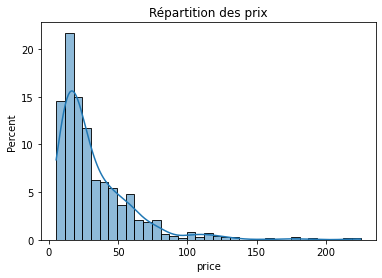

In [40]:
print('le prix modale est égal à :', data_sales.price.mode()[0], '€')
print('le prix moyen est égal à :', round(data_sales.price.mean(), 2),'€')
print('le prix médian est égal à :', data_sales.price.median(), '€')
# Histogramme 
sns.histplot(data = data_sales, x= 'price' , kde=True, stat="percent").set(title = 'Répartition des prix')
plt.show()

### Les mesures de dispersion :


La variance empirique du prix est égale à : 773.4252964551889
La variance empirique sans biais du prix est égale à : 772.342067748669
L'écart-type empirique du prix est égal à 27.810524922323722 



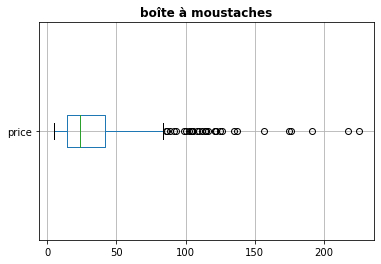

Le prix maximal est de : 225.0
Le prix minimal est de : 5.2
Le premier quartile est égal à : 14.1
Le troisième quartile est égal à: 42.175000000000004
L écart interquartile est égal à : 28.075000000000003


In [41]:
var_price = data_sales.price.var()
print('\nLa variance empirique du prix est égale à :',var_price)# Variance emperique
var_sb_price = data_sales.price.var(ddof=0)
print('La variance empirique sans biais du prix est égale à :',var_sb_price)# variance empirique sans biais
std_price = data_sales.price.std()
print("L'écart-type empirique du prix est égal à",std_price,'\n') # écart-type empirique

plt.title("boîte à moustaches", fontweight ="bold")
data_sales.boxplot(column = 'price', vert = False)
plt.show()

print('Le prix maximal est de :', data_sales.price.max())
print('Le prix minimal est de :', data_sales.price.min())
Q1 = data_sales.price.quantile(0.25)
Q3 = data_sales.price.quantile(0.75)
IQR = Q3 - Q1
print('Le premier quartile est égal à :', Q1) # premier quartile
print('Le troisième quartile est égal à:', Q3) # troisième quartile
print('L écart interquartile est égal à :', IQR )# écart interquartile

### Les mesures de forme :

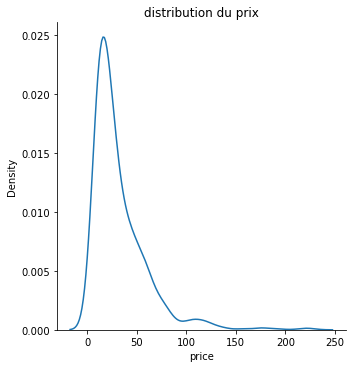


La distribustion des prix est étalée à droite:
Le Skewness est égal à 2.5809012630033705  > 0 


La distribustion des prix est moins aplatie que la distribution normale (les observations sont plus concentrées):
Le Kurtosis est égal à 10.088392064977292 > 0 



In [42]:
# Représentation graphique de la distribution des prix
sns.displot(data=data_sales, x="price", kind = 'kde').set(title = 'distribution du prix')
plt.show()
# Le Skewness empirique
skew_price = data_sales.price.skew()
print('\nLa distribustion des prix est étalée à droite:') 
print('Le Skewness est égal à',skew_price,' > 0 \n' )
# Le Kurtosis empirique
kurtosis_price = data_sales.price.kurtosis()
print('\nLa distribustion des prix est moins aplatie que la distribution normale (les observations sont plus concentrées):') 
print('Le Kurtosis est égal à',kurtosis_price, '> 0 \n')

## <a name="C12">3.3. Détermination des prix aberrants :</a>  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

#### Visualisation de la répartition des prix à l'aide d'une boite à moustache :

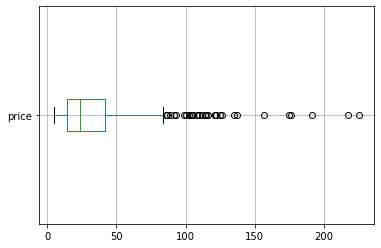

In [43]:
data_sales.boxplot(column = 'price', vert = False)
plt.show()

#### Détermination des valeurs aberrantes grâce à l'approche IQR :

In [44]:
# limites supérieure et inférieure pour des prix normaux 
upper = data_sales.price >= (Q3 + 1.5*IQR)
lower = data_sales.price <= (Q1 - 1.5*IQR)

#### Visualisation des outliers:

In [45]:
data_sales[upper+lower]

,post_name,price,total_sales,stock_quantity,stock_status,ca_product
64,zind humbrecht riesling gc rangen thann clos s...,100.0,0.0,11,instock,0.0
66,zind humbrecht pinot gris grand cru rangen de ...,88.4,0.0,5,instock,0.0
200,champagne egly ouriet grand cru millesime 2008,225.0,5.0,0,outofstock,1125.0
202,champagne egly ouriet grand cru brut blanc de ...,126.5,11.0,2,instock,1391.5
206,champagne larmandier bernier grand cru vieille...,85.6,1.0,0,outofstock,85.6
219,cognac frapin vip xo,176.0,13.0,8,instock,2288.0
220,cognac frapin fontpinot xo,108.5,2.0,2,instock,217.0
222,cognac frapin chateau de fontpinot 1989 20 ans,157.0,0.0,3,instock,0.0
223,cognac frapin cigar blend,104.0,1.0,6,instock,104.0
228,chateau de puligny montrachet 1cru champ canet...,109.6,0.0,7,instock,0.0


## <a name="C13">3.4. Chiffre d'affaire et catégories de prix :</a>  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a>  

On va procéder par la suite à une discrétisation de la variable "prix" afin d'étudier plus en détail le rapport entre les catégories de prix et le chiffre d'affaire.

In [46]:
# Création d'une colonne "cat_price" pour la catégorie de prix
data_sales['cat_price'] = pd.qcut(data_sales.price, 4)
data_sales.head()

,post_name,price,total_sales,stock_quantity,stock_status,ca_product,cat_price
0,bon cadeau de 25 euros,25.0,10.0,0,outofstock,250.0,"(23.55, 42.175]"
1,pierre jean villa saint joseph preface 2018,24.2,6.0,0,outofstock,145.2,"(23.55, 42.175]"
2,pierre jean villa saint joseph tilde 2017,34.3,0.0,0,outofstock,0.0,"(23.55, 42.175]"
3,pierre jean villa croze hermitage accroche coe...,20.8,0.0,0,outofstock,0.0,"(14.1, 23.55]"
4,pierre jean villa igp gamine 2018,14.1,3.0,0,outofstock,42.3,"(5.199, 14.1]"


Création d'une liste de chiffre d'affaire généré par catégorie de prix.

In [47]:
liste_ca_cat_price = []
for cat in data_sales['cat_price'].unique():
    liste_ca_cat_price.append(data_sales[data_sales.cat_price == cat].ca_product.sum())
liste_ca_cat_price

[16906.2, 13043.2, 10779.5, 29839.7]

Représentation graphique de répartition du chiffre d'affaire total par catégorie de prix à l'aide d'un diagramme circulaire. 

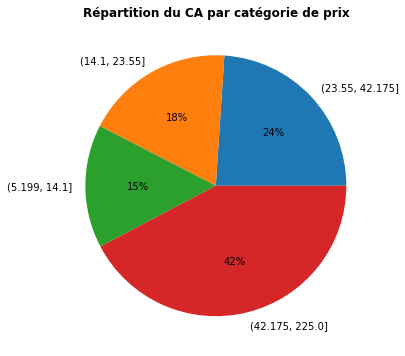

In [48]:
plt.figure(figsize = (6,6))
colors = sns.color_palette("Set1")
plt.title("Répartition du CA par catégorie de prix", fontweight ="bold")
plt.pie(liste_ca_cat_price, labels = data_sales['cat_price'].unique(), autopct = '%0.0f%%')
plt.show()

### Mesure de tendance centrale pour chaque catégorie de prix :

Catégorie de prix : (23.55, 42.175]
*****************
le mode du prix est égal à : 24.0 €
la moyenne du prix est égale à : 31.33 €
la mediane du prix est égale à : 29.9 €
CA réalisé : 16906.2 €, soit 23.96 % du CA

Deux représentations de la distribution du prix :


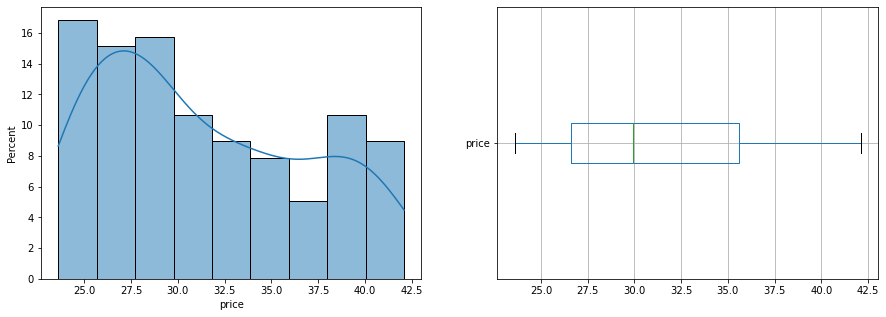

Catégorie de prix : (14.1, 23.55]
*****************
le mode du prix est égal à : 19.0 €
la moyenne du prix est égale à : 18.48 €
la mediane du prix est égale à : 18.2 €
CA réalisé : 13043.2 €, soit 18.48 % du CA

Deux représentations de la distribution du prix :


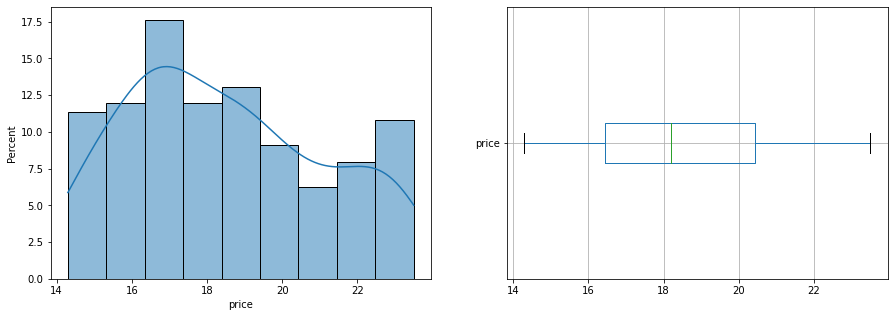

Catégorie de prix : (5.199, 14.1]
*****************
le mode du prix est égal à : 11.1 €
la moyenne du prix est égale à : 10.56 €
la mediane du prix est égale à : 10.8 €
CA réalisé : 10779.5 €, soit 15.28 % du CA

Deux représentations de la distribution du prix :


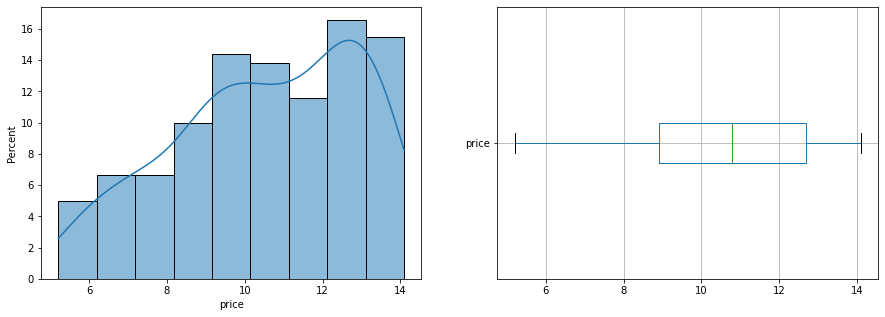

Catégorie de prix : (42.175, 225.0]
*****************
le mode du prix est égal à : 49.5 €
la moyenne du prix est égale à : 69.6 €
la mediane du prix est égale à : 59.0 €
CA réalisé : 29839.7 €, soit 42.28 % du CA

Deux représentations de la distribution du prix :


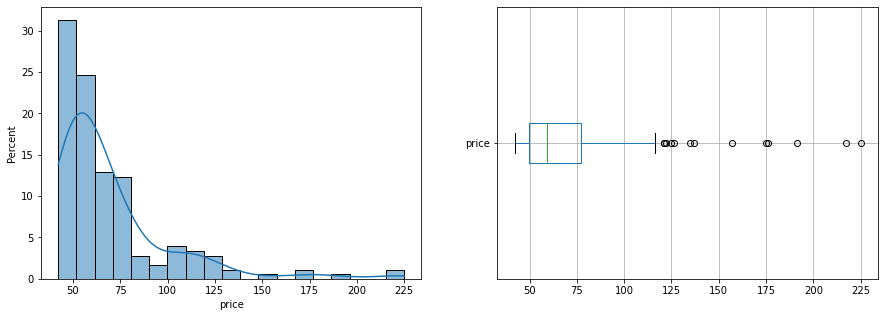

In [49]:
for cat in data_sales.cat_price.unique():
    df = data_sales[data_sales.cat_price == cat]
    print('Catégorie de prix :', cat)
    print('*****************')
    print('le mode du prix est égal à :' , df.price.mode()[0], '€')
    print('la moyenne du prix est égale à :' , round(df.price.mean(), 2), '€')
    print('la mediane du prix est égale à :' , df.price.median(), '€')
    print('CA réalisé :', round(df.ca_product.sum(), 2),'€, soit',
          round(df.ca_product.sum()*100/data_sales.ca_product.sum(), 2),'% du CA' )
    print('\nDeux représentations de la distribution du prix :')
   
    plt.figure(1,figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(data=df, x= df.price , kde=True, stat="percent")
    plt.subplot(1,2,2)
    df.boxplot(column = 'price', vert = False)
    plt.show()

### les mesures de concentration :

#### Etat des ventes à ce jour:

A ce jour, seulement 54 % des produits vendus contribuent au CA total.

In [50]:
data_total_sales = data_sales.total_sales.value_counts(normalize = True)
pr_product_sale = round(1 - data_total_sales[0], 2) * 100
liste_etat_vente = [data_total_sales[0], 1 - data_total_sales[0]]

In [65]:
print('\033[1m'+'Seulement',pr_product_sale, "% des produits contribuent au chiffre d'affaire total")

Seulement 54.0 % des produits contribuent au chiffre d'affaire total


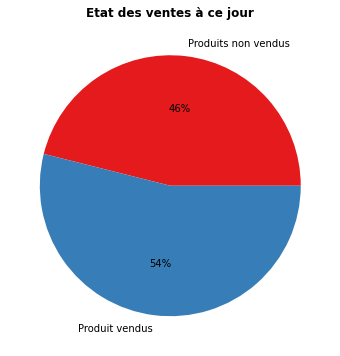

In [52]:
plt.figure(figsize = (6,6))
colors = sns.color_palette("Set1")
labels = ['Produits non vendus', 'Produit vendus']
plt.pie(liste_etat_vente, labels = labels, colors = colors, autopct = '%0.0f%%')
plt.title("Etat des ventes à ce jour", fontweight ="bold")
plt.show()

#### Courbe de Lorenz et indice de Gini : 

On peut confirmer cette mauvaise répartition de la participation des produits dans la création du chiffre d'affaire grâce à la courbe de Lorenz et au calcul de l'indice de Gini.

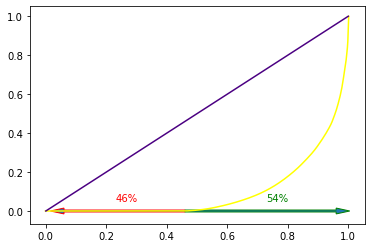

Seul 54 % des produits générent le chiffre d'affaire total 


In [64]:
# Courbe de Lorenz appliquée au chiffre d'affaire
data = data_sales['ca_product']
n = len(data)
Y = np.cumsum(np.sort(data))/ data.sum()
Y = np.append([0],Y) # La courbe de Lorenz commence à 0
X = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

sns.lineplot(X, Y, color = 'yellow')
sns.lineplot([0,1], [0,1], color = 'indigo')

plt.arrow(0.46, 0, -0.40, 0, width = 0.01, ec ='red')
plt.text(0.23, 0.05, '46%', color = 'red')
plt.arrow(0.46, 0, 0.50, 0, width = 0.01, ec ='green')
plt.text(0.73, 0.05, '54%', color = 'green')
plt.show()
print('\033[1m'+"Seul 54 % des produits générent le chiffre d'affaire total ")

In [63]:
# Calcul de l'indice de Gini
AUC = (Y.sum() -Y[-1]/2 -Y[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
print('\033[1m'+"L'indice de gini est égal à", gini,"(proche de 1, ce qui confirme la mauvaise répartition de la participation des produits dans la création du chiffre d'affaire global).")

L'indice de gini est égal à 0.8050420469738444 (proche de 1, ce qui confirme la mauvaise répartition de la participation des produits dans la création du chiffre d'affaire global).


#### Volume des ventes :

In [55]:
# Effectifs des nombre de ventes par produits
data_product_total_sales = data_sales.total_sales.value_counts()
# Produit des effectifs par le nombres de vente
vol_vente = np.array(data_product_total_sales.index * data_product_total_sales.values).sum()
print('Le volume total des ventes est de', vol_vente, 'unités.')

Le volume total des ventes est de 2865.0 unités.


#### Produits générants le plus haut/bas chiffre d'affaire : 

In [56]:
# liste des produits générants un CA strictement positif:
data_sales_positif = data_sales[data_sales.total_sales != 0] 

In [57]:
# les dix produits avec le plus haut CA:
data_sales_positif.nlargest(10, 'ca_product')

,post_name,price,total_sales,stock_quantity,stock_status,ca_product,cat_price
195,champagne gosset grand blanc de blanc,49.0,96.0,0,outofstock,4704.0,"(42.175, 225.0]"
72,champagne gosset grand rose,49.0,87.0,11,instock,4263.0,"(42.175, 225.0]"
219,cognac frapin vip xo,176.0,13.0,8,instock,2288.0,"(42.175, 225.0]"
71,champagne gosset grand millesime 2006,53.0,30.0,8,instock,1590.0,"(42.175, 225.0]"
70,gosset champagne grande reserve,39.0,40.0,1,instock,1560.0,"(23.55, 42.175]"
202,champagne egly ouriet grand cru brut blanc de ...,126.5,11.0,2,instock,1391.5,"(42.175, 225.0]"
200,champagne egly ouriet grand cru millesime 2008,225.0,5.0,0,outofstock,1125.0,"(42.175, 225.0]"
80,elian daros cotes du marmandais clos baquey 2015,29.0,36.0,0,outofstock,1044.0,"(23.55, 42.175]"
651,domaine giudicelli patrimonio blanc 2019,25.2,41.0,120,instock,1033.2,"(23.55, 42.175]"
31,gilles robin crozes hermitage papillon 2019,16.6,62.0,157,instock,1029.2,"(14.1, 23.55]"


In [58]:
# les dix produits avec le plus bas chiffre d'affaire 
data_sales_positif.nsmallest(10, 'ca_product')

,post_name,price,total_sales,stock_quantity,stock_status,ca_product,cat_price
360,chateau turcaud rose 2019,6.5,1.0,257,instock,6.5,"(5.199, 14.1]"
441,domaine de montgilet anjou rouge 2016 2,7.5,1.0,9,instock,7.5,"(5.199, 14.1]"
97,ollieux romanis monsieur pinot 2017,7.8,1.0,65,instock,7.8,"(5.199, 14.1]"
150,parce freres hommage fernand blanc 2019,8.9,1.0,7,instock,8.9,"(5.199, 14.1]"
153,parce freres igp pays oc zoe viognier 2019,8.9,1.0,141,instock,8.9,"(5.199, 14.1]"
296,chateau plaisance fronton rose 2019,9.1,1.0,42,instock,9.1,"(5.199, 14.1]"
174,domaine serol cote roannaise cabochard 2016,9.2,1.0,25,instock,9.2,"(5.199, 14.1]"
628,borie la vitarele pays herault cigales 2019,9.3,1.0,124,instock,9.3,"(5.199, 14.1]"
290,domaine rotier gaillac rouge les gravels 2016,9.5,1.0,161,instock,9.5,"(5.199, 14.1]"
164,chermette domaine du vissoux beaujolais griott...,9.9,1.0,89,instock,9.9,"(5.199, 14.1]"


#### Produits non vendus à ce jour :

In [59]:
data_sales[['post_name']][data_sales.total_sales == 0]

,post_name
2,pierre jean villa saint joseph tilde 2017
3,pierre jean villa croze hermitage accroche coe...
5,pierre jean villa cote rotie carmina 2017
6,pierre jean villa saint joseph saut ange 2018
7,pierre gaillard condrieu 2018
...,...
706,jean faure saint emilion grand cru 2015
710,camin larredya jurancon sec la virada 2018
711,jamet cote rotie fructus voluptas 2018
712,clos du mont olivet chateauneuf du pape 2007 2


## <a name="C14">3.5. Recherche de correlation entre les variables :</a> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<a href="#C0">Top </a> 

#### Matrice de correlation :

In [60]:
data_sales_corr = data_sales[['price', 'total_sales', 'stock_quantity']].corr()
data_sales_corr

,price,total_sales,stock_quantity
price,1.000000,-0.133353,-0.293144
total_sales,-0.133353,1.000000,0.273654
stock_quantity,-0.293144,0.273654,1.000000


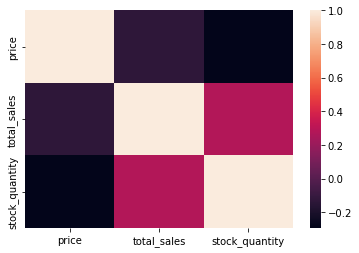

In [61]:
# Représentation graphique type "carte-chaleur" des corrélations entre variables :
sns.heatmap(data_sales_corr)
plt.show()

#### Conclusion : Il n'existe pas de corrélation entre ces variables quantitaives.